In [1]:
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

# Esperar a que se cargue el archivo
def on_upload_change(change):
    for name, file_info in uploader.value.items():
        print(f"Cargando archivo: {name}")
        with open(name, "wb") as f:
            f.write(file_info['content'])

uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='.csv', description='Upload')

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Cargar el dataset de Iris
data = load_iris()

X, y = data.data, data.target
"""
Similar a 
X = data.data  # Características
y = data.target  # Etiqueta

"""

feature_names = data.feature_names
target_names = data.target_names

# Crear un DataFrame para explorar los datos (opcional)
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = y
print("Primeras filas del dataset:\n", df.head())


Primeras filas del dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de prueba: (30, 4)


Matriz de confusión: Indica cuántos ejemplos se clasificaron correctamente o incorrectamente para cada clase.
Reporte de clasificación:

    Precisión: Porcentaje de predicciones correctas para cada clase.
    Recall: Proporción de ejemplos de una clase que fueron correctamente clasificados.
    F1-Score: Media armónica entre precisión y recall.

Media armónica?


La **media armónica** es una medida estadística que se utiliza para calcular un promedio cuando los datos están relacionados con tasas o proporciones. Es especialmente útil cuando quieres dar un mayor peso a los valores más pequeños en el cálculo del promedio.

### **Fórmula de la media armónica**

Para un conjunto de \( n \) números \( x_1, x_2, ..., x_n \), la media armónica (\( H \)) se calcula como:

$
H = \frac{n}{\sum_{i=1}^n \frac{1}{x_i}}
$

#### **Ejemplo:**
Si tienes los números \( x_1 = 2 \), \( x_2 = 3 \), y \( x_3 = 4 \), la media armónica sería:

$
H = \frac{3}{\frac{1}{2} + \frac{1}{3} + \frac{1}{4}}
$

1. Calculamos los recíprocos: $ \frac{1}{2} = 0.5 $,  $\frac{1}{3} \approx 0.333 $, $ \frac{1}{4} = 0.25 $.
2. Sumamos los recíprocos: $ 0.5 + 0.333 + 0.25 = 1.083 $.
3. Dividimos $ n $ entre la suma: $ \frac{3}{1.083} \approx 2.77 $.

Por lo tanto, la media armónica de \( 2, 3, 4 \) es aproximadamente \( 2.77 \).

---

### **Comparación con otras medias**

- **Media aritmética**:
 $
  A = \frac{x_1 + x_2 + ... + x_n}{n}
 $
  Promedio "normal", que da igual peso a todos los valores.

- **Media geométrica**:
  $
  G = \sqrt[n]{x_1 \cdot x_2 \cdot ... \cdot x_n}
 $
  Promedio que considera el producto de los números, útil en tasas de crecimiento.

- **Media armónica**:
  Da más peso a los valores pequeños y es útil para promediar tasas, como velocidad promedio.

---

### **¿Cuándo usar la media armónica?**

1. **Tasas y proporciones:**
   - Es útil cuando los números representan tasas o relaciones inversas, como velocidad promedio o densidad.
   - Ejemplo: Si un coche viaja 60 km a 30 km/h y otros 60 km a 60 km/h, la velocidad promedio no es la media aritmética, sino la media armónica:
    $H = \frac{2}{\frac{1}{30} + \frac{1}{60}} = 40 \, \text{km/h}.
     $

2. **Métricas en Machine Learning:**
   - Se utiliza en el cálculo del **F1-score**, que es la media armónica entre precisión y recall:
La fórmula del F1-Score es $F1 = 2 \cdot \frac{\text{Precisión} \cdot \text{Recall}}{\text{Precisión} + \text{Recall}}$.


     Esto equilibra las dos métricas, penalizando valores extremos.


### **Conclusión**

La media armónica es útil para promediar datos relacionados con tasas o proporciones, y tiene aplicaciones prácticas en problemas de física, economía y machine learning. 

In [5]:


from scipy.stats import hmean

# Datos
values = [2, 3, 4]

# Media armónica
harmonic_mean = hmean(values)
print("Media armónica:", harmonic_mean)



Media armónica: 2.769230769230769


In [6]:
# Crear un modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)

# Ajustar el modelo a los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)


In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Evaluación: Matriz de confusión y reporte de clasificación
#Muestra cuántos ejemplos de cada clase fueron clasificados correctamente y cuáles fueron confundidos.
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

#Proporciona precisión, recall y F1-score para cada clase.
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names, labels=[0, 1, 2]))


Matriz de confusión:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



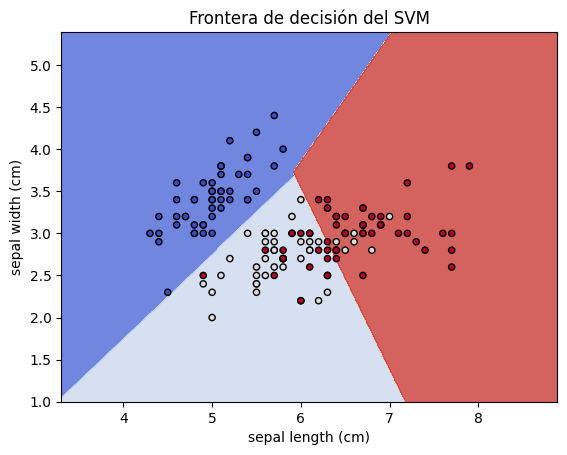

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#Gráfica que muestra cómo el modelo separa las diferentes clases basándose en las dos primeras características.
# Usar solo las primeras dos características para visualización
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Entrenar el modelo con las dos primeras características
svm_vis_model = SVC(kernel='linear', random_state=42)
svm_vis_model.fit(X_train_vis, y_train_vis)

# Crear un meshgrid para las fronteras
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir clases para cada punto del meshgrid
Z = svm_vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Frontera de decisión del SVM")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()


Ejercicio: 
Cambia el kernel de SVM ('linear', 'rbf', 'poly') y observa cómo cambia el desempeño.

Usa todas las características en lugar de solo las primeras dos para entrenar el modelo completo.


### **1. Experimentar con diferentes kernels**
El kernel define cómo el modelo transforma los datos para encontrar la frontera de decisión. Los kernels más comunes son:
- **`linear`**: Línea recta para separar las clases.
- **`rbf`**: Kernel gaussiano para relaciones no lineales.
- **`poly`**: Kernel polinómico para relaciones más complejas.

#### **Código con diferentes kernels**
```python


In [10]:
from sklearn.svm import SVC


In [11]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [12]:
unique_classes = np.unique(y_test)

# Ajustar target_names a las clases presentes en y_test
target_names_adjusted = [target_names[i] for i in unique_classes]

In [13]:
# Probar diferentes kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    # Crear y entrenar el modelo SVM
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = svm_model.predict(X_test)
    
    # Evaluación
    print(f"\nKernel: {kernel}")
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, target_names=target_names_adjusted))




Kernel: linear
Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Kernel: rbf
Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Kernel: poly
Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versic


### **Resultados esperados**
1. **Kernel `linear`:**
   - Separa las clases con una línea recta o un hiperplano.
2. **Kernel `rbf`:**
   - Modela relaciones no lineales, generalmente mejora el rendimiento en conjuntos de datos no linealmente separables.
3. **Kernel `poly`:**
   - Añade términos polinómicos, lo que puede ser útil para relaciones complejas, pero puede ser más sensible a los hiperparámetros.

---

### **2. Ajustar hiperparámetros del SVM**

#### **Hiperparámetros importantes:**
- **`C`**: Controla la penalización por errores (regularización). Valores pequeños permiten más errores en el entrenamiento.
- **`gamma`**: Define cómo se mide la influencia de un punto en el kernel `rbf`. Valores altos generan fronteras ajustadas, pero pueden sobreajustar.

#### **Código para optimización con GridSearchCV**


In [14]:

from sklearn.model_selection import GridSearchCV

# Definir un rango de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar en el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test)
print("\nReporte de clasificación con los mejores hiperparámetros:")
print(classification_report(y_test, y_pred, target_names=target_names_adjusted))



Fitting 5 folds for each of 18 candidates, totalling 90 fits

Mejores hiperparámetros encontrados:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Reporte de clasificación con los mejores hiperparámetros:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30




### **3. Usar todas las características para la visualización**

Dado que no podemos graficar directamente en más de 2 dimensiones, usaremos PCA (Análisis de Componentes Principales) para reducir las características a 2 dimensiones y luego graficar.

#### **Código con PCA**


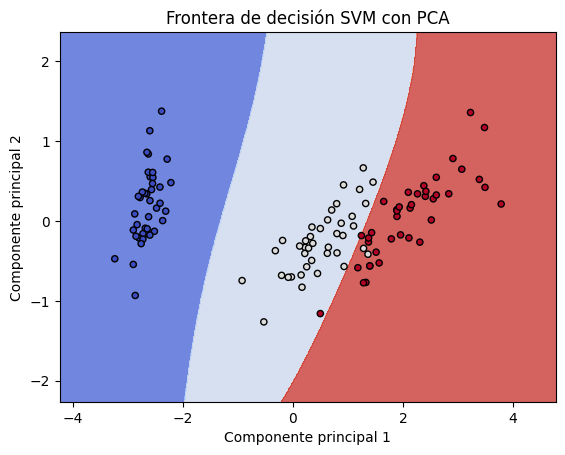

In [15]:

from sklearn.decomposition import PCA

# Reducir las características a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar un modelo SVM con PCA
svm_pca_model = SVC(kernel='rbf', random_state=42)
svm_pca_model.fit(X_train_pca, y_train)

# Visualizar la frontera de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_pca_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Frontera de decisión SVM con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()




### **4. Comparar métricas entre kernels y configuraciones**

Usamos validación cruzada para comparar el rendimiento entre los kernels y combinaciones de hiperparámetros:

In [16]:

from sklearn.model_selection import cross_val_score

# Comparar rendimiento entre kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
    print(f"Kernel: {kernel}, Precisión promedio: {scores.mean():.4f}")



Kernel: linear, Precisión promedio: 0.9800
Kernel: rbf, Precisión promedio: 0.9667
Kernel: poly, Precisión promedio: 0.9800



### **Resultados esperados**
1. **Optimización de hiperparámetros:**
   - `GridSearchCV` identifica los mejores valores para `C`, `gamma` y `kernel`, mejorando la precisión.

2. **Visualización con PCA:**
   - El gráfico muestra cómo el modelo SVM separa las clases en un espacio reducido.

3. **Comparación de kernels:**
   - Generalmente, `rbf` tiene un buen equilibrio entre simplicidad y precisión.
   - `linear` es más rápido, pero puede no capturar relaciones no lineales.
   - `poly` puede ser útil para relaciones complejas, pero es más sensible a la configuración de hiperparámetros.



La precisión entre linear y poly es prácticamente la misma, ¿por qué?

Probemos con un dataset no linealmente separable


Kernel: linear
Matriz de confusión:
[[33  5]
 [ 4 48]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.91      0.92      0.91        52

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90


Kernel: rbf
Matriz de confusión:
[[37  1]
 [ 2 50]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.96      0.97        52

    accuracy                           0.97        90
   macro avg       0.96      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90


Kernel: poly
Matriz de confusión:
[[33  5]
 [ 3 49]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89    

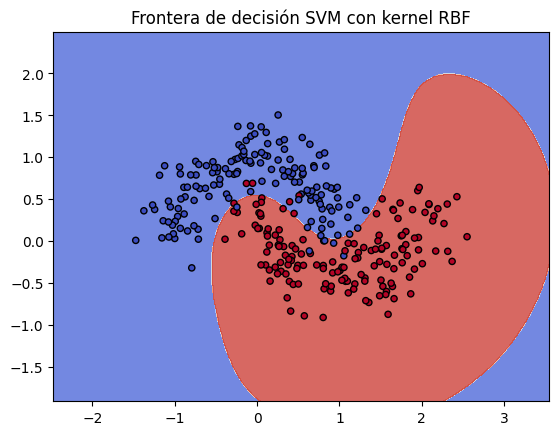

In [17]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Crear un dataset no lineal
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Probar diferentes kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"\nKernel: {kernel}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

# Visualizar las fronteras de decisión con rbf
svm_rbf = SVC(kernel='rbf', random_state=42).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Frontera de decisión SVM con kernel RBF")
plt.show()


GridSearchCV???????

`GridSearchCV` es una herramienta en `scikit-learn` utilizada para encontrar los **mejores hiperparámetros** de un modelo al probar todas las combinaciones posibles de un conjunto definido de valores. Es especialmente útil para ajustar modelos de machine learning y optimizar su rendimiento.

---

### **¿Qué hace exactamente `GridSearchCV`?**

1. **Define un espacio de búsqueda de hiperparámetros:**
   - Especificas los valores que deseas probar para cada hiperparámetro del modelo.
   
2. **Evalúa todas las combinaciones posibles:**
   - Para cada combinación de hiperparámetros, entrena el modelo y evalúa su rendimiento utilizando validación cruzada.

3. **Selecciona los mejores hiperparámetros:**
   - Basándose en una métrica definida (como precisión, F1-score, etc.), selecciona la combinación que obtiene el mejor resultado.

4. **Devuelve el mejor modelo entrenado:**
   - Una vez que encuentra los mejores hiperparámetros, puedes usarlos directamente para predecir.

---

### **Sintaxis de `GridSearchCV`**

```python
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=modelo,        # Modelo que deseas ajustar
    param_grid=parametros,   # Diccionario con los hiperparámetros y sus valores
    scoring='accuracy',      # Métrica de evaluación (opcional)
    cv=5,                    # Número de particiones para validación cruzada
    verbose=1,               # Nivel de detalle en la salida (opcional)
    n_jobs=-1                # Número de CPUs a usar (-1 utiliza todas)
)
grid_search.fit(X_train, y_train)  # Ajustar el grid search
```

---

### **Ejemplo básico: Ajustar SVM**

Vamos a ajustar una máquina de soporte vectorial (SVM) para un dataset utilizando `GridSearchCV`.

#### **1. Importar las bibliotecas y cargar los datos**
```python
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Cargar el dataset Iris
data = load_iris()
X, y = data.data, data.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

#### **2. Definir el modelo y los hiperparámetros**
```python
# Modelo base
svm_model = SVC()

# Espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],         # Parámetro de regularización
    'gamma': [1, 0.1, 0.01, 0.001], # Influencia de los puntos en kernel RBF
    'kernel': ['rbf', 'linear']     # Tipo de kernel
}
```

#### **3. Crear y ajustar el GridSearchCV**
```python
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ajustar el GridSearchCV
grid_search.fit(X_train, y_train)
```

#### **4. Obtener los resultados**
```python
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))
```

---

### **Explicación de los parámetros**

1. **`param_grid`**:
   - Es un diccionario donde defines los hiperparámetros a explorar y sus posibles valores.

   Ejemplo:
   ```python
   param_grid = {
       'C': [0.1, 1, 10],
       'kernel': ['linear', 'rbf']
   }
   ```

2. **`cv`**:
   - Número de particiones para la validación cruzada. Por defecto, usa 5.

3. **`scoring`**:
   - Métrica que se usará para evaluar el modelo (por ejemplo, `'accuracy'`, `'f1'`, `'roc_auc'`).

4. **`verbose`**:
   - Controla el nivel de detalle durante el ajuste. Por ejemplo, `verbose=1` muestra el progreso.

5. **`n_jobs`**:
   - Define el número de procesadores a usar en paralelo. `n_jobs=-1` utiliza todos los disponibles.

---

### **Beneficios de `GridSearchCV`**

1. **Automatización**:
   - Permite probar múltiples combinaciones de hiperparámetros de forma automática.
   
2. **Validación cruzada integrada**:
   - Reduce el riesgo de sobreajuste al evaluar el modelo en diferentes particiones de los datos.

3. **Optimización eficiente**:
   - Encuentra la mejor configuración de hiperparámetros para maximizar el rendimiento del modelo.

---

### **Limitación**

Cuando el espacio de búsqueda de hiperparámetros es grande, `GridSearchCV` puede ser computacionalmente costoso porque evalúa todas las combinaciones posibles. En estos casos, considera usar:

- **`RandomizedSearchCV`**: Busca hiperparámetros aleatoriamente dentro del espacio definido.
- **Bayesian Optimization** o librerías como `Optuna` para búsquedas más eficientes.

---

### **Conclusión**

`GridSearchCV` es una herramienta poderosa para ajustar los hiperparámetros de un modelo y maximizar su rendimiento. Es ideal para realizar búsquedas exhaustivas en problemas pequeños o medianos. Si tienes un caso específico en mente o quieres explorar ejemplos más avanzados, ¡avísame! 😊